<a href="https://colab.research.google.com/github/SHAIMA-HAQUE/AI-Trainer/blob/main/Human_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is to classify between Human VS System Generated text using Kaggle LLM - Detect AI Generated Text

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c llm-detect-ai-generated-text

  0% 0.00/1.38M [00:00<?, ?B/s]
100% 1.38M/1.38M [00:00<00:00, 116MB/s]


In [3]:
!unzip ./llm-detect-ai-generated-text.zip

Archive:  ./llm-detect-ai-generated-text.zip
  inflating: sample_submission.csv   
  inflating: test_essays.csv         
  inflating: train_essays.csv        
  inflating: train_prompts.csv       


# Information about the dataset which is derived from Kaggle

**{test|train}_essays.csv**

id - A unique identifier for each essay.

prompt_id - Identifies the prompt the essay was written in response to.

text - The essay text itself.

generated - Whether the essay was written by a student (0) or generated by an LLM (1). This field is the target and is not present in test_essays.csv.


**train_prompts.csv** - Essays were written in response to information in these fields. **bold text**

prompt_id - A unique identifier for each prompt.

prompt_name - The title of the prompt.

instructions - The instructions given to students.

source_text - The text of the article(s) the essays were written in response to, in Markdown format. Significant paragraphs are enumerated by a numeral preceding the paragraph on the same line, as in 0 Paragraph one.\n\n1 Paragraph two.. Essays sometimes refer to a paragraph by its numeral. Each article is preceded with its title in a heading, like # Title. When an author is indicated, their name will be given in the title after by. Not all articles have authors indicated. An article may have subheadings indicated like ## Subheading.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the dataset from Kaggle

In [7]:
train_dataset = pd.read_csv("./train_essays.csv")
train_dataset.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [9]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


Check how many essays were written by students or LLMs in train_dataset

In [24]:
generated_distribution = train_dataset['generated'].value_counts().values
generated_distribution

array([1375,    3])

 1375 Student generated examples and only 3 LLM generated examples.

In [13]:
train_prompts_dataset = pd.read_csv("./train_prompts.csv")
train_prompts_dataset.head()

,prompt_id,prompt_name,instructions,source_text
0,0,Car-free cities,Write an explanatory essay to inform fellow ci...,"# In German Suburb, Life Goes On Without Cars ..."
1,1,Does the electoral college work?,Write a letter to your state senator in which ...,# What Is the Electoral College? by the Office...


In [14]:
train_prompts_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prompt_id     2 non-null      int64 
 1   prompt_name   2 non-null      object
 2   instructions  2 non-null      object
 3   source_text   2 non-null      object
dtypes: int64(1), object(3)
memory usage: 192.0+ bytes


There are only 2 prompts in this dataset. Hence, let's check the distribution of how many prompts were available in train_dataset



In [26]:
prompt_distribution = train_dataset['prompt_id'].value_counts().values
prompt_distribution

array([708, 670])

708 examples of prompt_id 0 which is "Car-free cities", and 670 examples of prompt_id which is "Does the electoral college work?"

In [20]:
test_dataset = pd.read_csv("./test_essays.csv")
test_dataset.head()

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [21]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         3 non-null      object
 1   prompt_id  3 non-null      int64 
 2   text       3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


Since the amount of AI generated text was only 3 in the test dataset, I wanted to add more datapoints to it.
I found this wonderful dataset created by DAREK KŁECZEK - https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset

I chose this, because he has managed to combine data generated from ChatGPT, Llama-70b and Falcon180b, GPT4, PaLM from Google Gen-A and many more...

In [27]:
!kaggle datasets download -d thedrcat/daigt-v2-train-dataset

 32% 9.00M/28.5M [00:00<00:00, 33.6MB/s]
100% 28.5M/28.5M [00:00<00:00, 84.2MB/s]


In [29]:
!unzip /content/daigt-v2-train-dataset.zip

Archive:  /content/daigt-v2-train-dataset.zip
  inflating: train_v2_drcat_02.csv   


In [30]:
train_dataset_extended = pd.read_csv('train_v2_drcat_02.csv')

In [31]:
train_dataset_extended.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [32]:
train_dataset_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44868 entries, 0 to 44867
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           44868 non-null  object
 1   label          44868 non-null  int64 
 2   prompt_name    44868 non-null  object
 3   source         44868 non-null  object
 4   RDizzl3_seven  44868 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 1.4+ MB


In [33]:
train_dataset_extended["prompt_name"].unique()

array(['Phones and driving', 'Car-free cities', 'Summer projects',
       '"A Cowboy Who Rode the Waves"',
       'Mandatory extracurricular activities', 'Exploring Venus',
       'Facial action coding system', 'The Face on Mars',
       'Community service', 'Grades for extracurricular activities',
       'Driverless cars', 'Does the electoral college work?',
       'Cell phones at school', 'Distance learning',
       'Seeking multiple opinions'], dtype=object)

# Combine the datasets

In [42]:
train_dataset_extended = train_dataset_extended.rename(columns=({"label":"generated"}))

In [43]:
train_dataset_final = pd.concat([train_dataset_extended[["text", "generated"]], train_dataset[["text", "generated"]]])

In [45]:
train_dataset_final.head()

,text,generated
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


In [46]:
train_dataset_final.isna().value_counts()

text   generated
False  False        46246
dtype: int64

In [47]:
train_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46246 entries, 0 to 1377
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       46246 non-null  object
 1   generated  46246 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


# Adding features and looking for differentiating factors between Human and AI generated text

Exploring whether the number of words of each essay has a clear distinction

In [49]:
train_dataset_final["text_length"] = train_dataset_final["text"].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

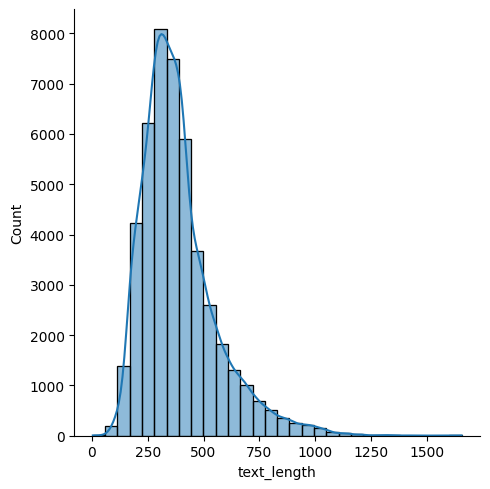

In [60]:
fig = plt.figure(figsize=(40,50))
sns.displot(data=train_dataset_final,
                 x="text_length", bins=30, kde=True)
fig.suptitle("Distribution of the length per essay - Train dataset")

<Figure size 4000x5000 with 0 Axes>

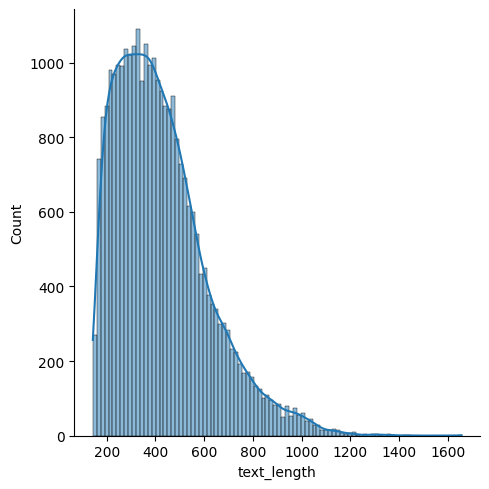

In [61]:
fig = plt.figure(figsize=(40,50))
sns.displot(data=train_dataset_final[train_dataset_final["generated"] == 0]["text_length"], label = "Student Essays", kde = True)

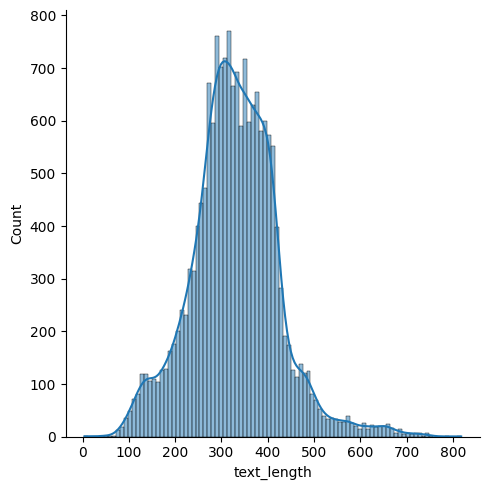

In [63]:
sns.displot(data=train_dataset_final[train_dataset_final["generated"] == 1]["text_length"], label = "AI essays", kde = True)


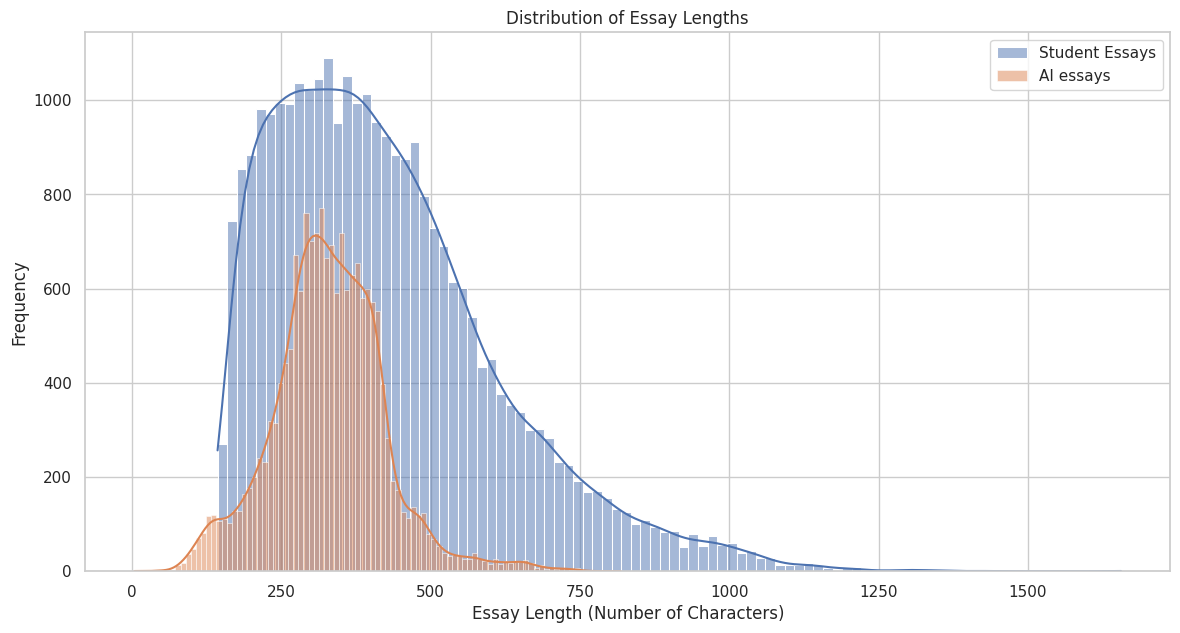

In [65]:
#plot the above plots on the same graph

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

#Student Essays
sns.histplot(data=train_dataset_final[train_dataset_final["generated"] == 0]["text_length"], label = "Student Essays", kde = True)
#AI generated Essays
sns.histplot(data=train_dataset_final[train_dataset_final["generated"] == 1]["text_length"], label = "AI essays", kde = True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Model